In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler

# Chargement et Nettoyage des jeuxde données.

## Chargement  et nettoyage du dataset(vin rouge). 

In [2]:
# Chargement des données du vin rouge à partir d'un fichier csv
df_1=pd.read_csv("winequality-red.csv", sep=';')
# Affichage des 5 premières lignes du DataFrame
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# types des données du vin rouge
df_1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Recherche des valeurs manquantes dans les données du vin rouge
df_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Information sur les données du vin rouge
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Création de la variable type de vin
df_1['type_wine']="red"
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


## Chargement et nettoyage du jeu de données (vin blanc).

In [7]:
# Chargement des données du vin blanc à partir d'un fichier csv
df_2=pd.read_csv("winequality-white.csv", sep=';')
# Affichage des 5 premières lignes du DataFrame
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# Types des données du vin blanc
df_2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# Recherche des valeurs manquantes dans les données du vin blanc
df_2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Information sur les données du vin blanc 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
df_2["type_wine"]="white"
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Concaténation des jeux de données vin blanc et vin rouge.

In [12]:
# Concaténation des deux bases de données df_1 et df_2
df=pd.concat([df_1,df_2], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [13]:
# Information sur des données du DataFrame concaténé
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_wine             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
# Vérification des valeurs manquantes dans le DataFrame concaténé
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
dtype: int64

## Analyse descriptive univariées

In [15]:
# Analyse descriptive du jeu de données
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [16]:
df.describe(include=object)

,type_wine
count,6497
unique,2
top,white
freq,4898


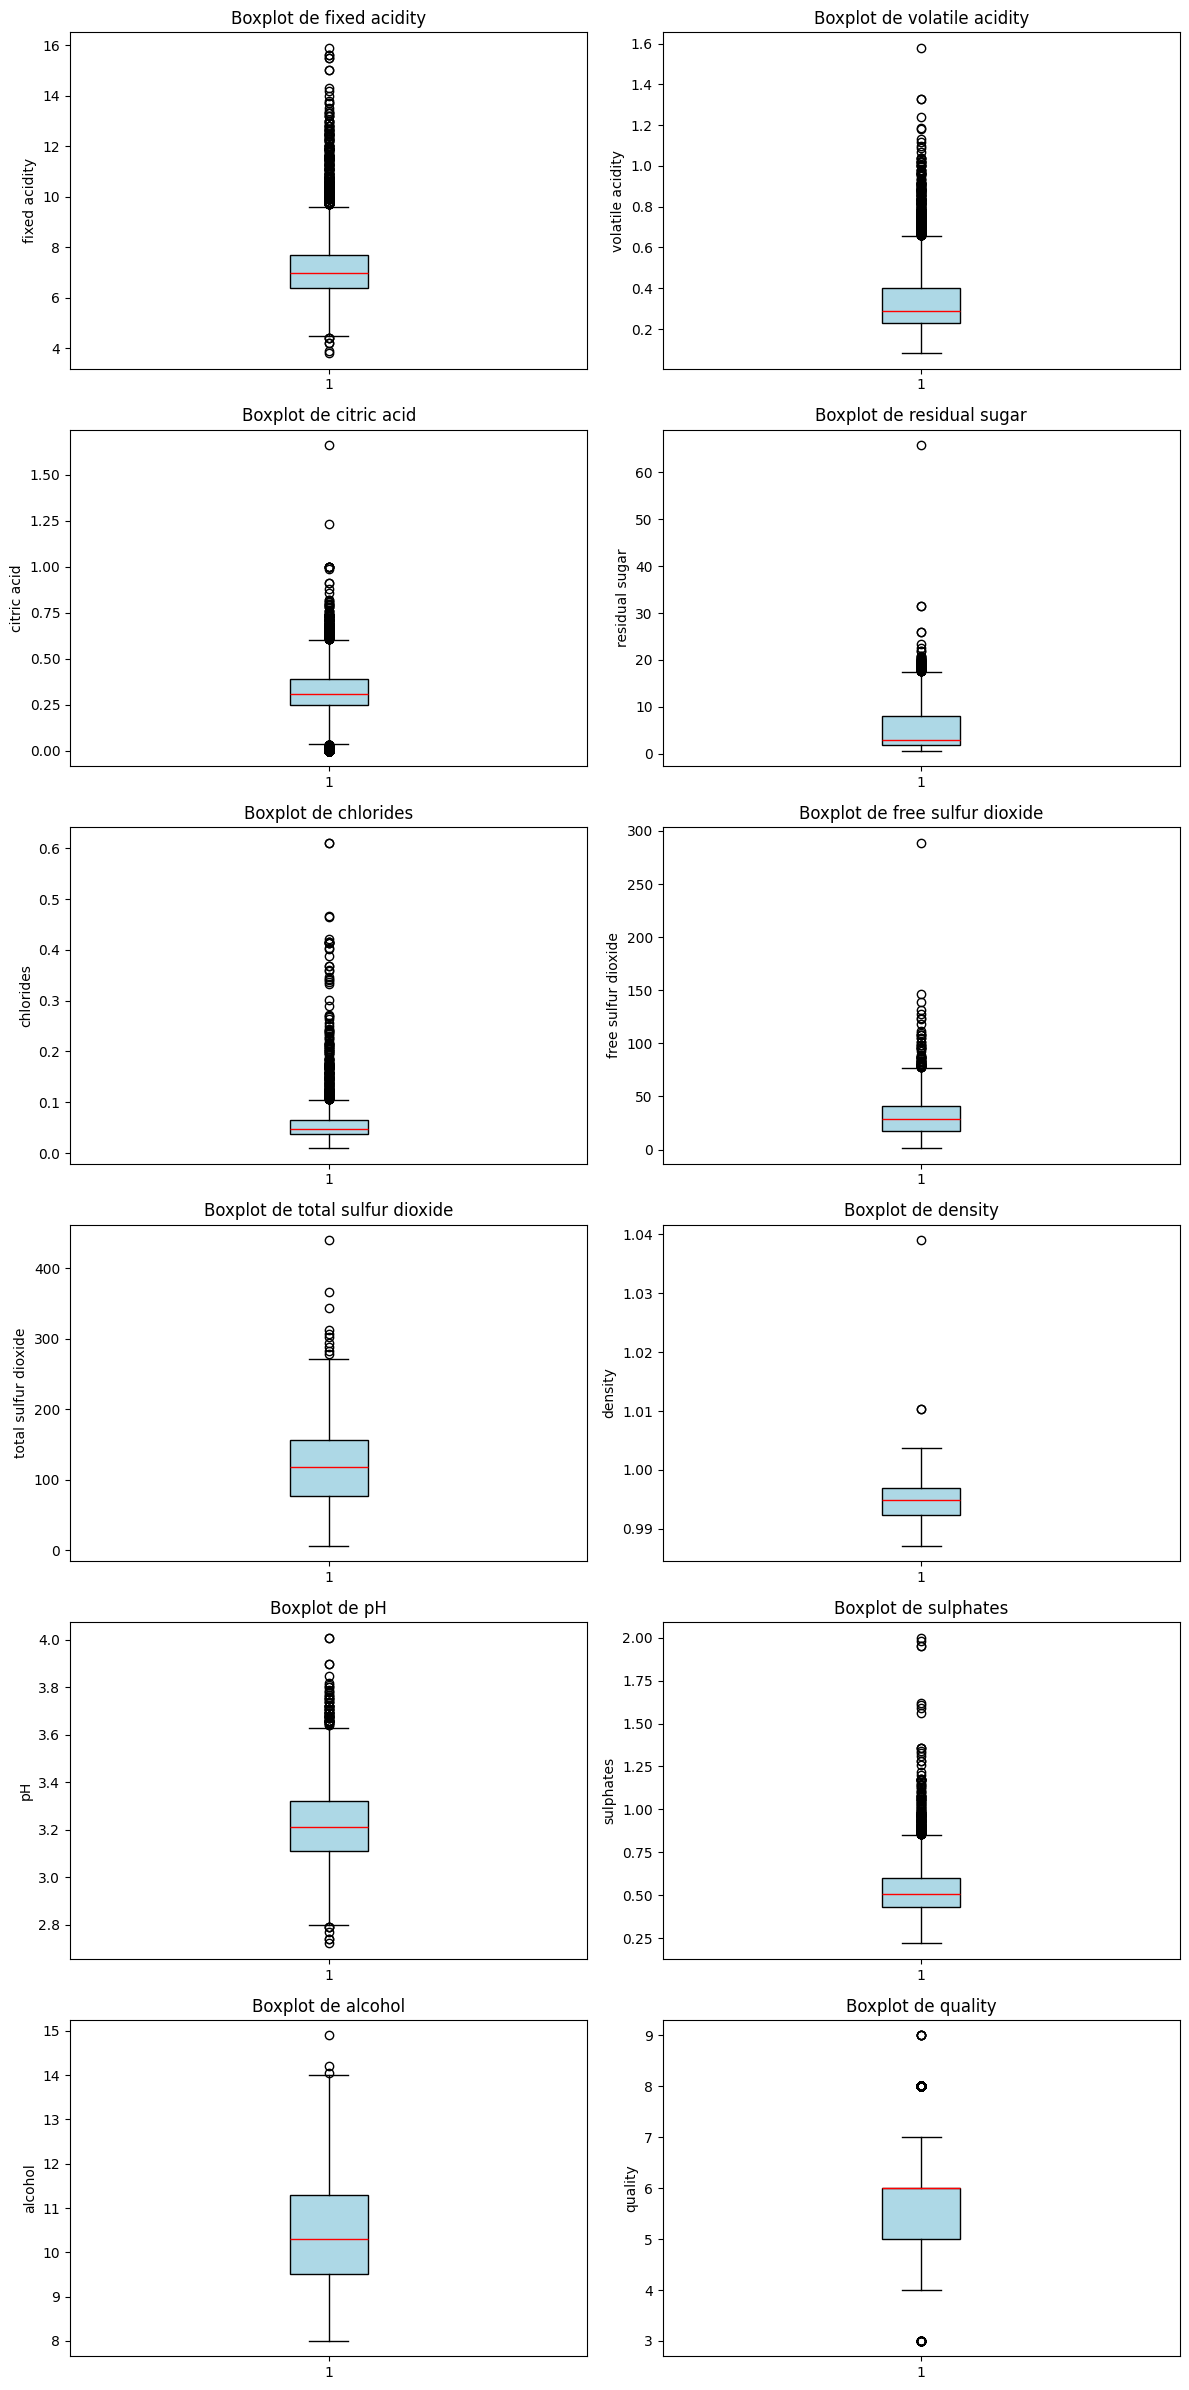

In [17]:
# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include='number').columns

# Définir le nombre de sous-graphiques nécessaires
n_vars = len(quant_vars)
n_rows = (n_vars // 2) + (n_vars % 2)  # 2 colonnes

fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Créer les boxplots
for i, var in enumerate(quant_vars):
    axes[i].boxplot(df[var].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red'))
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_ylabel(var)

# Supprimer les axes restants inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement
plt.tight_layout()
plt.show()

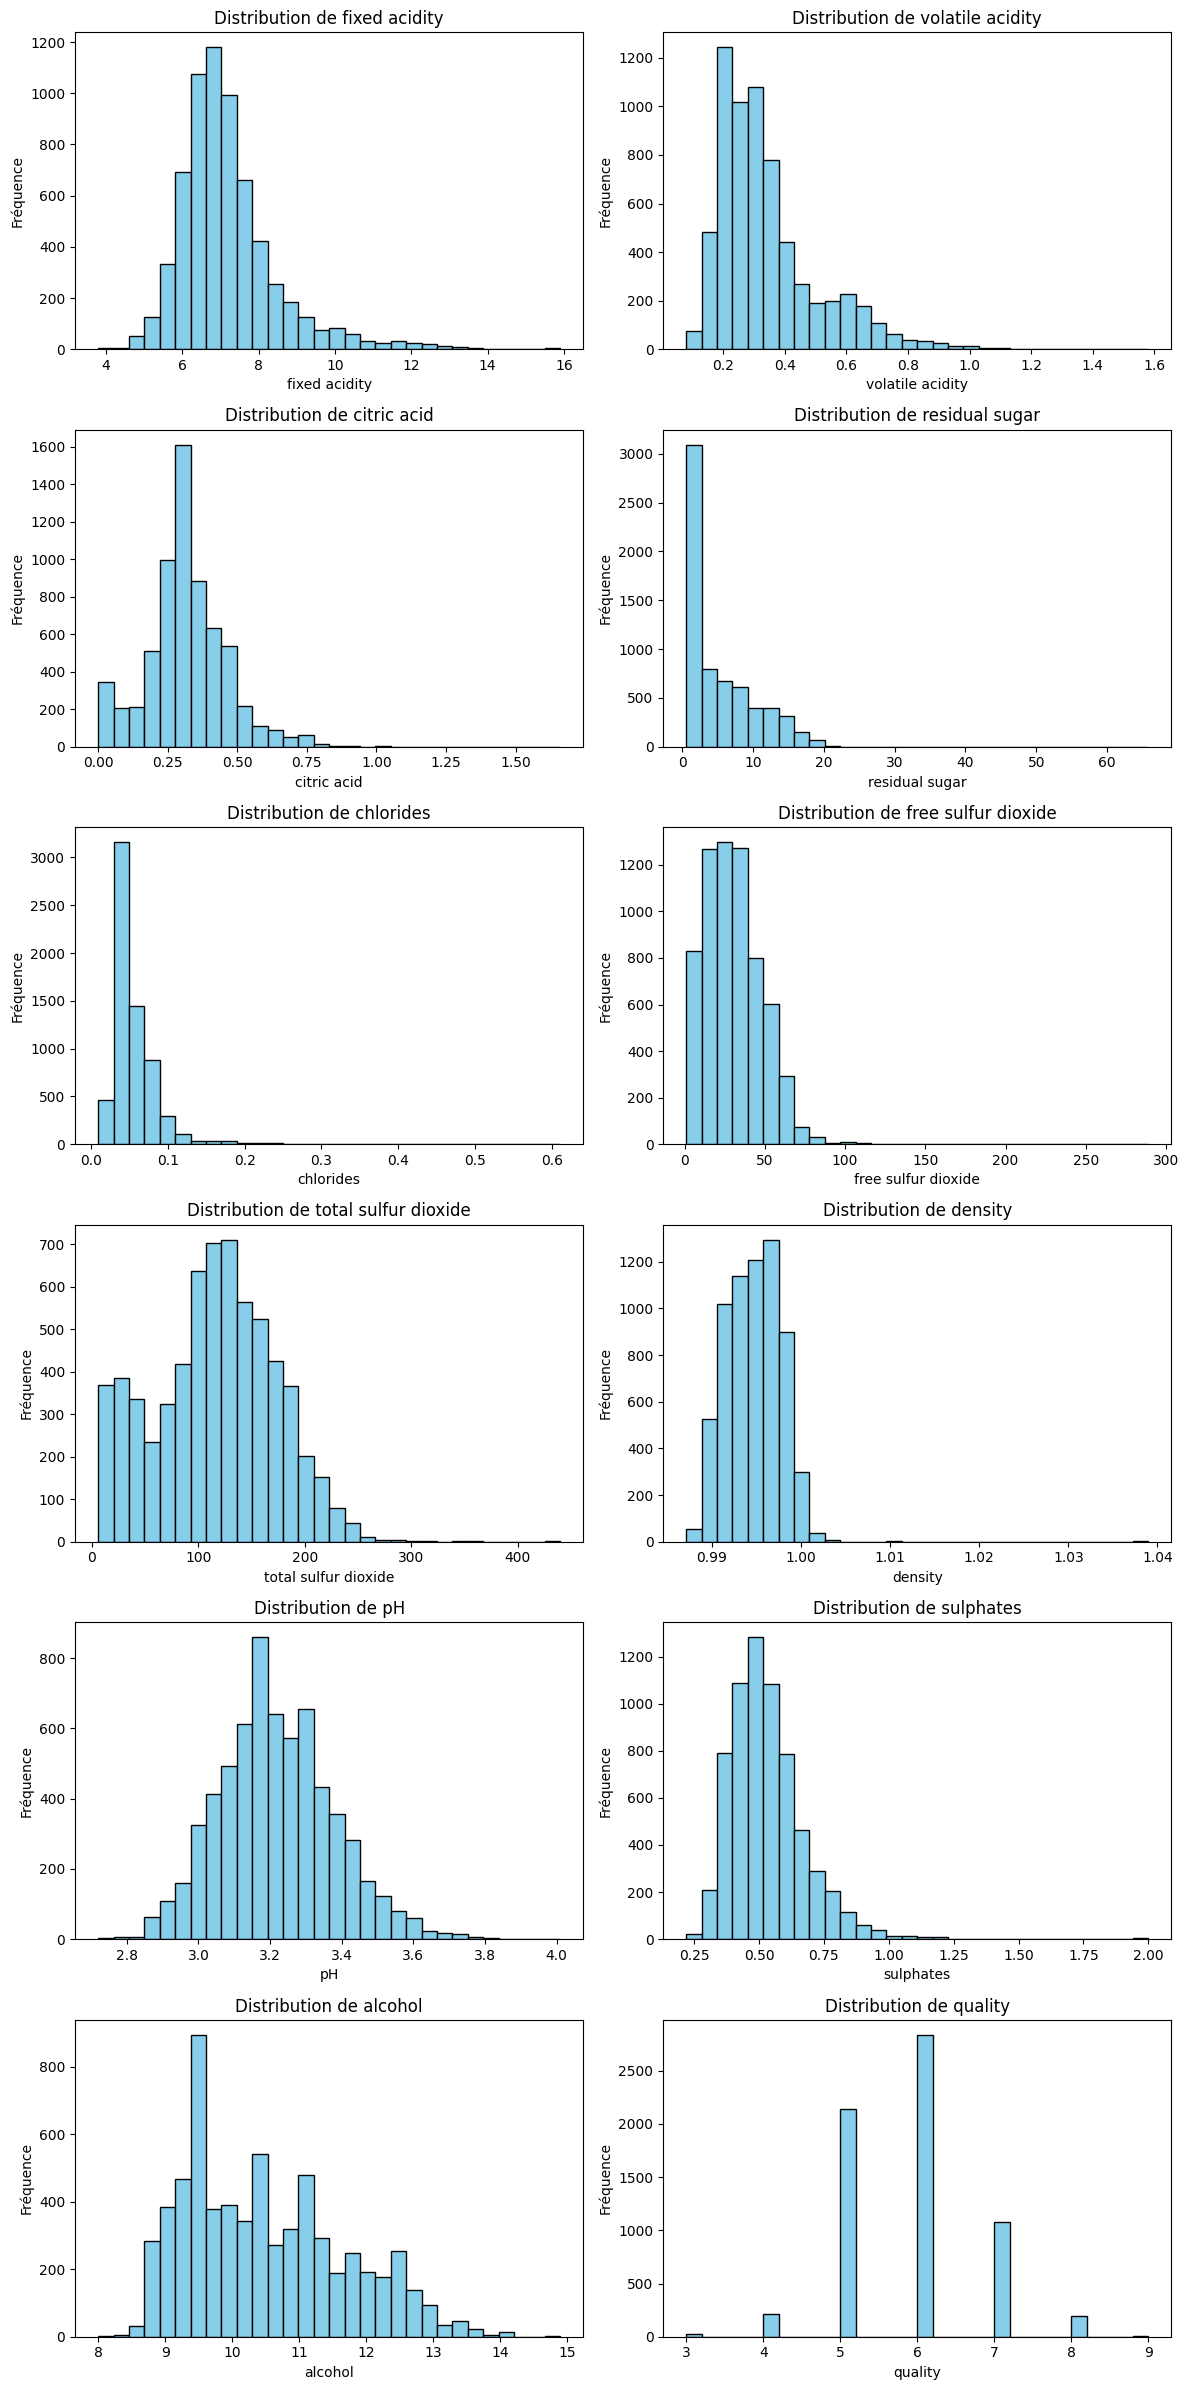

In [18]:
# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include='number').columns

# Définir le nombre de sous-graphiques nécessaires
n_vars = len(quant_vars)
n_rows = (n_vars // 2) + (n_vars % 2)  # 2 colonnes

fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Créer les histogrammes dans chaque sous-graphe
for i, var in enumerate(quant_vars):  # Utiliser quant_vars au lieu de df
    axes[i].hist(df[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes restants inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


In [19]:
# Résultats du test de Shapiro-Wilk
shapiro_results = {}

for column in df.select_dtypes(include='number').columns:
    stat, p_value = stats.shapiro(df[column])
    shapiro_results[column] = {'statistic': stat, 'p_value': p_value}

# Affichage sous forme de DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T
shapiro_df = shapiro_df.sort_values(by='p_value')

# Interprétation : p < 0.05 → rejet de H0 = non-normalité
shapiro_df['normalité (p>0.05)'] = shapiro_df['p_value'] > 0.05

shapiro_df

c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6497.
  res = hypotest_fun_out(*samples, **kwds)


,statistic,p_value,normalité (p>0.05)
chlorides,0.618317,1.453455e-80,False
residual sugar,0.824672,1.757308e-64,False
volatile acidity,0.875867,6.255995e-58,False
fixed acidity,0.879789,2.437973e-57,False
quality,0.884107,1.138821e-56,False
sulphates,0.898956,3.382989e-54,False
free sulfur dioxide,0.941289,5.790497e-45,False
alcohol,0.953532,2.918847e-41,False
citric acid,0.964977,5.262332e-37,False
density,0.968205,1.322803e-35,False


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_1964\3695593755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type_wine", palette="Set2")


<Axes: xlabel='type_wine', ylabel='count'>

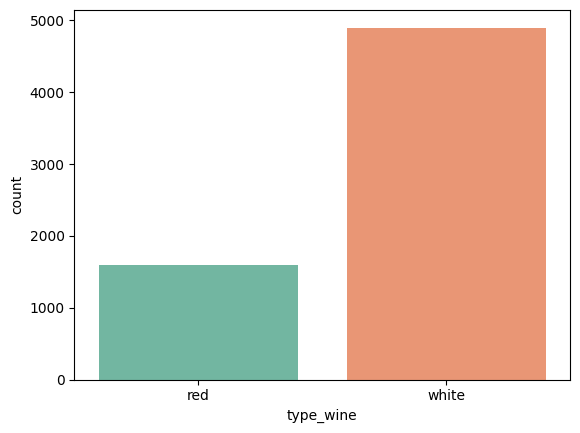

In [20]:
## Analyse de la variable qualitative "type_wine"
sns.countplot(data=df, x="type_wine", palette="Set2")

In [21]:
# Création d'un tableau de contingence pour la variable qualitative "type_wine"
con_table= pd.crosstab(index=df["type_wine"], columns="count")/len(df)
con_table

col_0,count
type_wine,
red,0.246114
white,0.753886


<Axes: ylabel='count'>

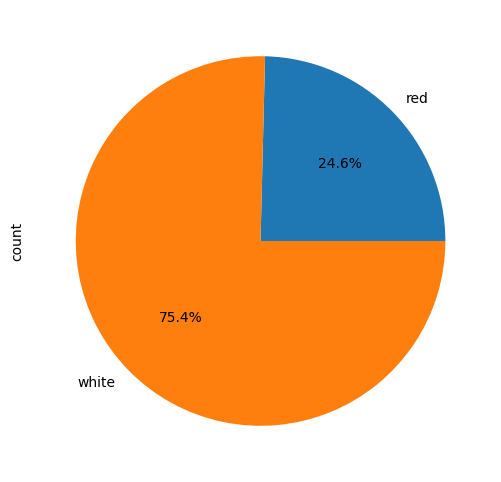

In [22]:
# Création d'un chart circulaire pour la variable qualitative "type_wine"
con_table.plot.pie(y="count", autopct="%1.1f%%", figsize=(8,6), legend=False)

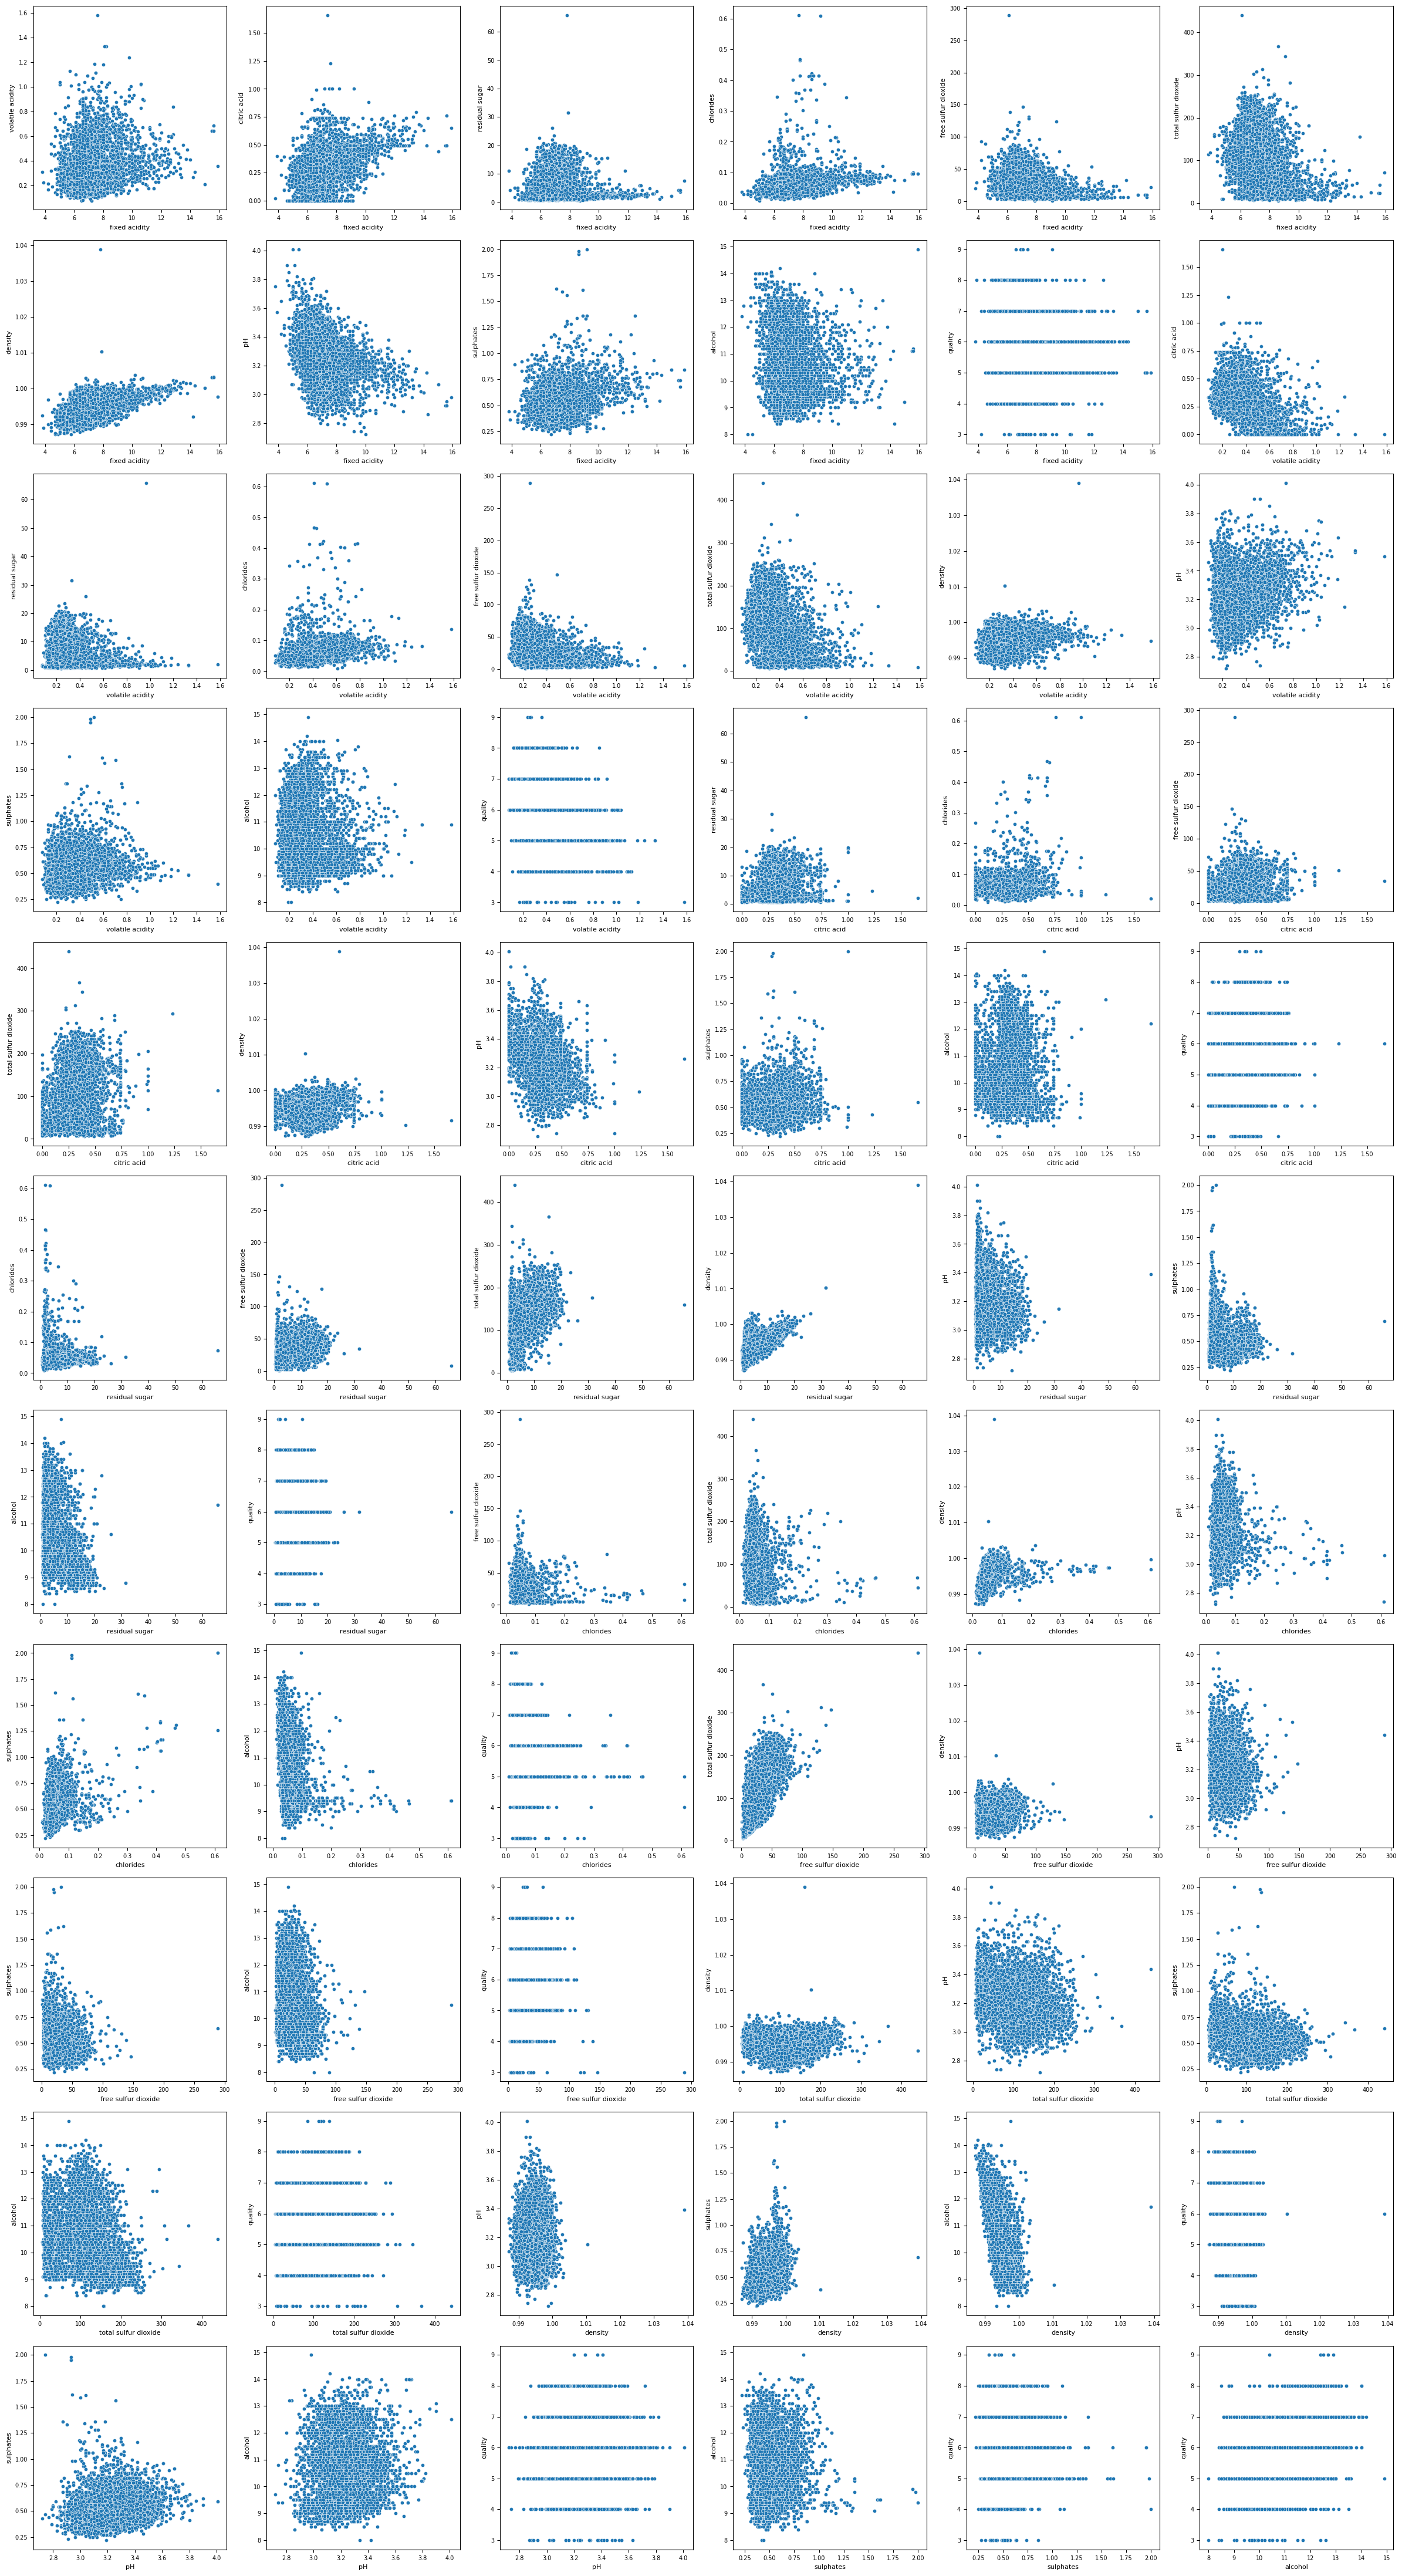

In [23]:
import itertools
# Garde uniquement les variables quantitatives (au cas où)
quant_vars = df.select_dtypes(include='number').iloc[:, :12]  # garder les 12 premières quantitatives

# Générer toutes les combinaisons de paires uniques de variables (sans doublon ni répétition)
combinations = list(itertools.combinations(quant_vars.columns, 2))

# Paramètres de mise en page
plots_per_row = 6
num_plots = len(combinations)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # arrondi supérieur

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(4*plots_per_row, 4*num_rows))
axes = axes.flatten()

for i, (var1, var2) in enumerate(combinations):
    sns.scatterplot(x=quant_vars[var1], y=quant_vars[var2], ax=axes[i], s=20)
    axes[i].set_xlabel(var1, fontsize=8)
    axes[i].set_ylabel(var2, fontsize=8)
    axes[i].tick_params(labelsize=7)

# Supprimer les axes vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Analyse bivariées

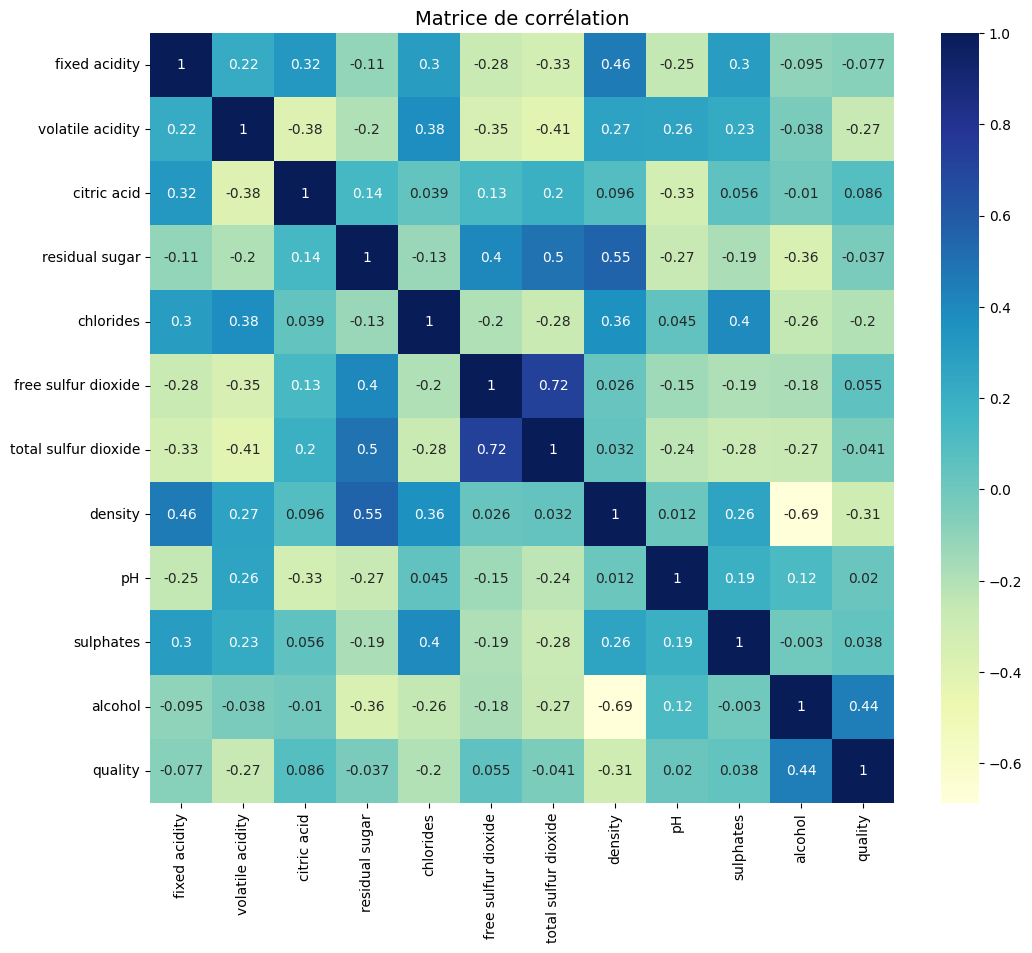

In [24]:
# Calcul de la matrice de corrélation
correlation_matrice=quant_vars.corr()

# Affichage de Heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrice, annot=True, cmap="YlGnBu")
plt.title("Matrice de corrélation", fontsize=14)
plt.show()

## Analyse multivariée l'ACP

### Construction de L'ACP

In [25]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [26]:
# Séparation des deonnées en varaibles explicatives X et varaible qualitatives Y.
X=df.iloc[:, :-1].values
Y=df.iloc[:,-1].values

In [27]:
# Normalisation et Standarisation des données.
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

In [28]:
# Application de l'ACP
pca=PCA()
X_pca=pca.fit_transform(X)

## Aide à l'interprétation

In [29]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

ValueError: All arrays must be of the same length